## Import

In [1]:
import numpy as np, pandas as pd
import seaborn as sns, pylab as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirpath = "/content/drive/MyDrive/Colab Notebooks/SetpointReinforcementLearning/results/"

## Figure 2 - testing on mode


In [4]:
test_file = "test_mode_cartpole.csv"
df_testing = pd.read_csv(dirpath + test_file)
df_testing.head()

,Unnamed: 0,train,tested_on,episode,time,action-1,state-1,state,state_c,action,reward
0,0,modele_-1_classique,0,0,0,0.0,0.032208,0.031698,0.0,1,1.0
1,1,modele_-1_classique,0,0,1,1.0,0.027067,0.032208,0.0,1,1.0
2,2,modele_-1_classique,0,0,2,1.0,0.016279,0.027067,0.0,1,1.0
3,3,modele_-1_classique,0,0,3,1.0,-0.000189,0.016279,0.0,1,1.0
4,4,modele_-1_classique,0,0,4,1.0,-0.022407,-0.000189,0.0,0,1.0


In [5]:
# columns
time = "time"
columns = ["state",	"state_c"]

### Variation à la consigne

pas tres interessant..

In [6]:
"""
for _, group in df_testing.groupby("tested_on") :
  # update
  group["var"] = group["state_c"] - group["state"]
  # plot
  g = sns.FacetGrid(group, col="train", col_wrap=3)
  g.map_dataframe(sns.lineplot, x="time", y="var")
  g.add_legend()
  #plt.savefig(dirpath+"figure_test_cartpole.svg")
  plt.show()
"""

'\nfor _, group in df_testing.groupby("tested_on") :\n  # update\n  group["var"] = group["state_c"] - group["state"]\n  # plot\n  g = sns.FacetGrid(group, col="train", col_wrap=3)\n  g.map_dataframe(sns.lineplot, x="time", y="var")\n  g.add_legend()\n  #plt.savefig(dirpath+"figure_test_cartpole.svg")\n  plt.show()\n'

### Boxplot

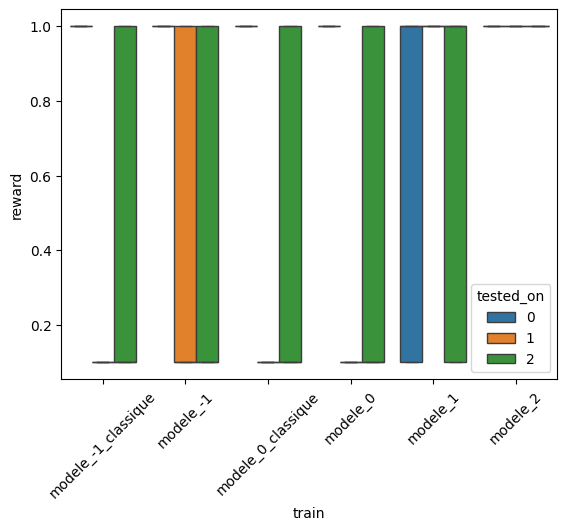

In [7]:
#sns.pointplot(data=df_testing["reward"], color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
sns.boxplot(x = df_testing['train'], y = df_testing['reward'], hue = df_testing['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
#plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

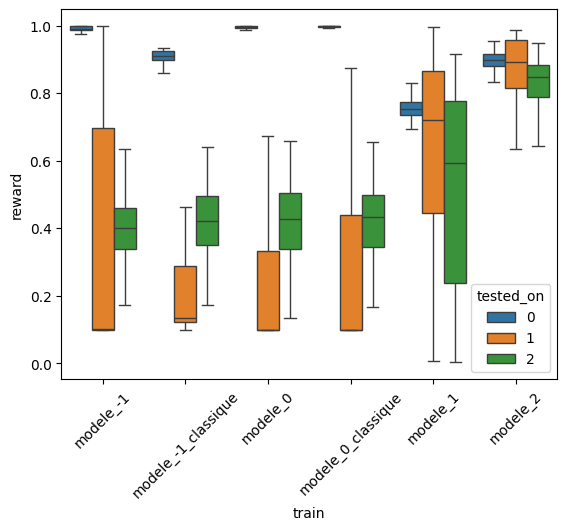

In [8]:
choice_clm = ["train","tested_on","episode","reward"]
gb = df_testing[choice_clm].groupby(["train","tested_on","episode"])
df_sum = df_testing[choice_clm].groupby(["train","tested_on","episode"], as_index=False)['reward'].sum()
sns.boxplot(x = df_sum['train'], y = df_sum['reward'].divide(499), hue = df_sum['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
plt.xticks(rotation=45)
plt.show()

In [56]:
# same info in describes
df_norm = df_sum[["tested_on","train","reward"]]
df_norm["reward"] = df_norm["reward"].divide(499)
df_norm.groupby(["tested_on","train"]).describe()

<ipython-input-56-e2f80dfa5318>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm["reward"] = df_norm["reward"].divide(499)


reward                                          \
                               count      mean       std       min       25%   
tested_on train                                                                
0         modele_-1            100.0  0.990367  0.007745  0.963727  0.987174   
          modele_-1_classique  100.0  0.906896  0.023820  0.803206  0.898798   
          modele_0             100.0  0.991828  0.012019  0.938477  0.992585   
          modele_0_classique   100.0  0.996409  0.002605  0.987174  0.995741   
          modele_1             100.0  0.754076  0.028954  0.694990  0.734669   
          modele_2             100.0  0.896236  0.024870  0.833868  0.878958   
1         modele_-1            100.0  0.345830  0.351972  0.099800  0.099800   
          modele_-1_classique  100.0  0.301100  0.307235  0.099800  0.123246   
          modele_0             100.0  0.285373  0.320758  0.099800  0.099800   
          modele_0_classique   100.0  0.315745  0.340206  0.099800  0.099800   
          modele_1             100.0  0.615743  0.347312  0.006012  0.445942   
          modele_2             100.0  0.857934  0.158981  0.010621  0.814930   
2         modele_-1            100.0  0.394004  0.093657  0.173747  0.337425   
          modele_-1_classique  100.0  0.415413  0.102236  0.173747  0.350050   
          modele_0             100.0  0.417794  0.118162  0.135872  0.337425   
          modele_0_classique   100.0  0.422772  0.110688  0.168337  0.343287   
          modele_1             100.0  0.502453  0.295999  0.003808  0.239078   
          modele_2             100.0  0.794335  0.149186  0.173747  0.787425   

                                                             
                                    50%       75%       max  
tested_on train                                              
0         modele_-1            0.990782  0.997996  0.997996  
          modele_-1_classique  0.909619  0.924048  0.933066  
          modele_0             0.996192  0.997996  0.997996  
          modele_0_classique   0.997996  0.997996  0.997996  
          modele_1             0.753607  0.774349  0.830261  
          modele_2             0.896994  0.915481  0.954709  
1         modele_-1            0.103407  0.698146  0.997996  
          modele_-1_classique  0.134970  0.287826  0.936673  
          modele_0             0.099800  0.333818  0.997996  
          modele_0_classique   0.099800  0.437976  0.997996  
          modele_1             0.720240  0.865882  0.994389  
          modele_2             0.892485  0.958317  0.985371  
2         modele_-1            0.401002  0.460070  0.633667  
          modele_-1_classique  0.421743  0.495240  0.640882  
          modele_0             0.428056  0.505611  0.657114  
          modele_0_classique   0.433467  0.499749  0.655311  
          modele_1             0.593086  0.777054  0.915030  
          modele_2             0.847395  0.884369  0.949299

### Space Space (mode 2)

In [10]:
df_mode2 = df_testing[df_testing["tested_on"]>1][["train","state","state_c","action"]]
df_mode2.head()

,train,state,state_c,action
99600,modele_-1_classique,-0.036269,-0.102027,1
99601,modele_-1_classique,-0.036086,-0.102136,1
99602,modele_-1_classique,-0.041982,-0.102274,1
99603,modele_-1_classique,-0.053954,-0.102446,0
99604,modele_-1_classique,-0.072039,-0.102656,0


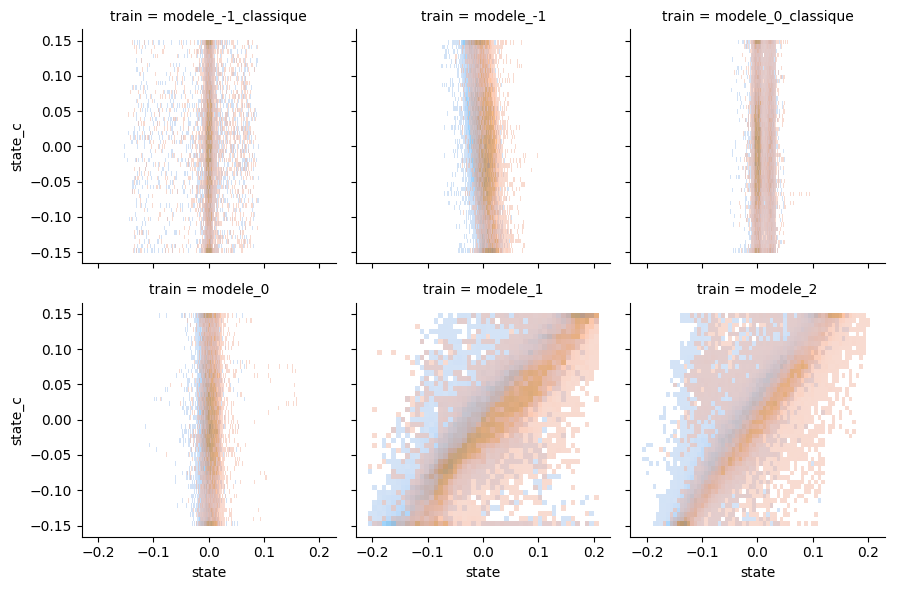

In [11]:
#g = sns.FacetGrid(df_mode2.sample(6*500), col="train", col_wrap=3)
g = sns.FacetGrid(df_mode2, col="train", col_wrap=3)
#g.map_dataframe(sns.scatterplot, x="state", y="state_c", hue="action", alpha=0.5)
#g.map_dataframe(sns.kdeplot, x="state", y="state_c", hue="action", fill=True, common_norm=False, levels=10, alpha=0.9)#, alpha=0.9, linewidth=0,)
g.map_dataframe(sns.histplot, x="state", y="state_c", hue="action", alpha=0.5, fill=True)
g.add_legend()
plt.show()

C'est pas tres jolie.. Essayons avec une heatmap

In [12]:
df_mode2_reduce = df_mode2.round(2)
df_mode2_reduce.head()

,train,state,state_c,action
99600,modele_-1_classique,-0.04,-0.1,1
99601,modele_-1_classique,-0.04,-0.1,1
99602,modele_-1_classique,-0.04,-0.1,1
99603,modele_-1_classique,-0.05,-0.1,0
99604,modele_-1_classique,-0.07,-0.1,0


In [13]:
df2hmap = df_mode2_reduce.pivot_table(index='state_c', columns='state', values='action', aggfunc='mean')
df2hmap.head()

state,-0.21,-0.20,-0.19,-0.18,-0.17,-0.16,-0.15,-0.14,-0.13,-0.12,...,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21
state_c,,,,,,,,,,,,,,,,,,,,,
-0.15,0.0,0.0,0.057143,0.000000,0.014286,0.008850,0.075758,0.385681,0.561446,0.672986,...,0.333333,1.0,0.0,0.5,0.5,0.5,NaN,0.5,0.0,1.0
-0.14,0.4,0.2,0.000000,0.041667,0.000000,0.026786,0.038627,0.223642,0.483516,0.599303,...,1.000000,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN
-0.13,NaN,0.0,0.000000,0.000000,0.000000,0.024390,0.037383,0.057143,0.276190,0.455150,...,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
-0.12,NaN,0.0,0.000000,0.111111,0.000000,0.025000,0.000000,0.028369,0.111607,0.344828,...,NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
-0.11,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.037037,0.011628,0.072398,0.207006,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN


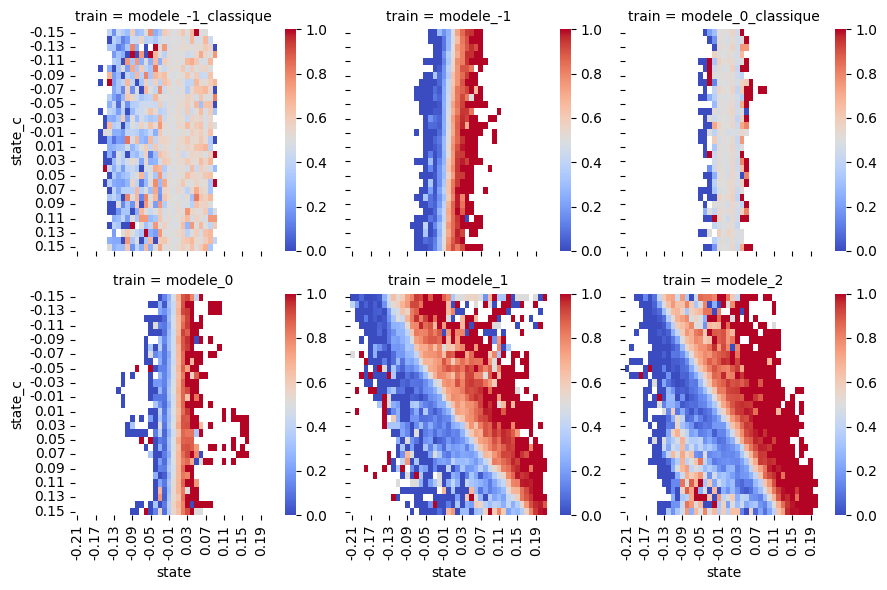

In [57]:
def facet_heatmap(data, agg="mean", tickl=None, **kws):
  data = data.pivot_table(index='state_c', columns='state', values='action', aggfunc=agg)
  if tickl != None :
    d = pd.DataFrame(np.nan, index=tickl["y"], columns=tickl["x"])
    d.loc[data.index, data.columns] =  data
    data = d
  #data = data.interpolate(method='nearest')
  sns.heatmap(data, **kws)

tickl = {"y":df2hmap.index, "x":df2hmap.columns}

g = sns.FacetGrid(df_mode2_reduce, col="train", col_wrap=3)#, sharex=False)
g = g.map_dataframe(facet_heatmap, agg="mean", tickl=tickl, cmap='coolwarm')
plt.show()